## Handwritten digit recognition using MINST dataset

In [ ]:
import torch
import helper
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

In [ ]:
from torchvision import datasets, transforms

# Define tranform to normalise data
transform = transforms.Compose([transforms.ToTensor(),
                                transforms.Normalize((0.5), (0.5)),
                              ])

# Downloading and loading the dataset
trainset = datasets.MNIST('MINIST_data/', download=True, train=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=64, shuffle=True)
# batch_size is no.of images we get in one iteration from dataloader and pass through our network often called Batch.
# shuffle=True shuffles the dataset every time we start going through the data loader again

  0%|          | 0/9912422 [00:00<?, ?it/s]

Extracting MINIST_data/MNIST/raw/train-images-idx3-ubyte.gz to MINIST_data/MNIST/raw



  0%|          | 0/28881 [00:00<?, ?it/s]

Extracting MINIST_data/MNIST/raw/train-labels-idx1-ubyte.gz to MINIST_data/MNIST/raw



  0%|          | 0/1648877 [00:00<?, ?it/s]

Extracting MINIST_data/MNIST/raw/t10k-images-idx3-ubyte.gz to MINIST_data/MNIST/raw



  0%|          | 0/4542 [00:00<?, ?it/s]

Extracting MINIST_data/MNIST/raw/t10k-labels-idx1-ubyte.gz to MINIST_data/MNIST/raw



The train data is loaded into **trainloader** and we make that an iterator with **iter(trainloader)** and later loop through the dataset for training.

Here the images is just a tensor with size (64, 1, 28, 28). So, 64 images per batch, 1 color channel, and 28x28 images.

In [ ]:
dataiter = iter(trainloader)
images, labels = dataiter.next()

print(type(images))
print(images.shape)
print(labels.shape)

<class 'torch.Tensor'>
torch.Size([64, 1, 28, 28])
torch.Size([64])


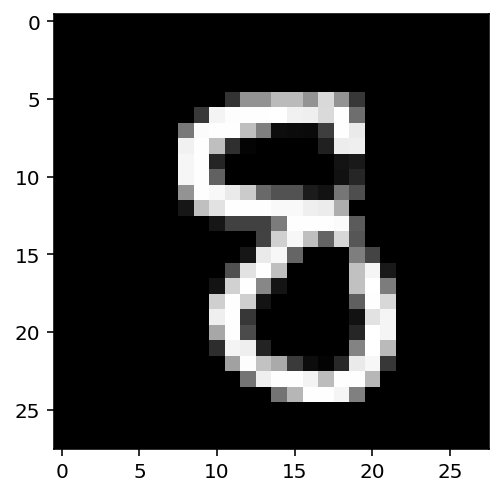

In [ ]:
plt.imshow(images[0].numpy().squeeze(), cmap='Greys_r')

## Example Program


**Exercise:** Flatten the batch of images. then build a multi-layer network with 784 input units, 256 hidden units and 10 output units using random tensors for the weights and biases. Use a sigmoid activation function for hidden layer. Leave the output layer without an activation, we'll add one that gives us a probability distrubution next.

In [ ]:
# Solution

# Sigmoid Activation function
def activation(x):
  ''' Sigmoid Activation Function '''
  return 1/(1+torch.exp(-x))

# Flattening the input images 
# (images.shape[0], -1) -> Takes the batch size and total no.of elements
inputs = images.view(images.shape[0], -1)

# Defining size of each layer
n_input = 784
n_hidden = 256
n_output = 10

# W & B for input to hidden layer
w1 = torch.randn(n_input, n_hidden)
b1 = torch.randn(n_hidden)

# W & B for hidden to output layer
w2 = torch.randn(n_hidden, n_output)
b2 = torch.randn(n_output)

# Activation 
h = activation(torch.mm(inputs, w1) + b1)

# Output
output = torch.mm(h, w2) + b2
print(output.shape)

torch.Size([64, 10])


Now we have 10 outputs for our network. We want to pass in an image to our network and get out a probability distrubution over the classes and tells us the likely classes the image belong to. Also,

*   Here the probability of each class is roughly the same. This is representing the untrained network.
*   It hasn't seen any data yet so it just returns a uniform distrubution with equal probabilities for each class.


To calculate this probability distrubution we often use **Softmax function**( Squish each input x between 0 and 1 and normalizes the values to give you a proper probability distrubution where the probabilities sum up to one)

In [ ]:
# Softmax
def softmax(x):
  ''' Softmax function '''
  return torch.exp(x)/torch.sum(torch.exp(x), dim=1).view(-1, 1)

probabilities = softmax(output)

# Checking the shape
print(probabilities.shape)

# Checking sum=1
print(probabilities.sum(dim=1))

torch.Size([64, 10])
tensor([1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000])


## Building Networks using NN Module

Pytorch provides a module **nn** that makes building networks much simpler. The below is the implementation of above exercise in **nn module**.

In [ ]:
from torch import nn

In [ ]:
class Network(nn.Module):
  def __init__(self):
    super().__init__()

    # Input to hidden layer linear transformation
    self.hidden = nn.Linear(784, 256)

    # Output layer, 10 units - one for each digit
    self.output = nn.Linear(256, 10)

    # Define Sigmoid activation and softmax output
    self.sigmoid = nn.Sigmoid()
    self.softmax = nn.Softmax(dim=1)

  def forward(self, x):
    # Pass the input tensor through each of our operations
    x = self.hidden(x)
    x = self.sigmoid(x)
    x = self.output(x)
    x = self.softmax(x)
    return x

# Create the network and look at its text representation
model = Network()
model

Network(
  (hidden): Linear(in_features=784, out_features=256, bias=True)
  (output): Linear(in_features=256, out_features=10, bias=True)
  (sigmoid): Sigmoid()
  (softmax): Softmax(dim=1)
)

You can define network somewhat more concisely and clearly using the **torch.nn.functional** module. This is the most common way you will see networks defined as many operations are simple elemnt-wise functions.

In [ ]:
import torch.nn.functional as F

class Network(nn.Module):
  def __init__(self):
    super().__init__()

    self.hidden = nn.Linear(784, 256)
    self.output = nn.Linear(256, 10)

  def forward(self, x):
    # Hidden layer with sigmoid activation
    x = F.sigmoid(self.hidden(x))
    # Output layer with softmax activation
    x = F.softmax(self.output(x), dim=1)
    return x

# Create the network and look at its text representation
model = Network()
model

Network(
  (hidden): Linear(in_features=784, out_features=256, bias=True)
  (output): Linear(in_features=256, out_features=10, bias=True)
)

## Example Program

**Exercise:** Create a network with 784 input units, a hidden layer with 128 units and relu activation, then a hidden layer with 64 units and a Relu activation, and finally an output layer with a softmax activation. 

You can use Relu activation with **nn.Relu** module or **F.relu** function

In [ ]:
from torch import nn
import torch.nn.functional as F

class Network(nn.Module):
  def __init__(self, input=784, hid1=128, hid2=64, out=10):
    super().__init__()

    self.hidden1 = nn.Linear(input, hid1)
    self.hidden2 = nn.Linear(hid1, hid2)
    self.output = nn.Linear(hid2, out)

    def forward(self, x):
      h1 = self.hidden1(x)
      a1 = F.relu(h1)
      h2 = self.hidden2(a1)
      a2 = F.relu(h2)
      output = F.log_softmax(a2)
      return output

model = Network()

# Checking weight and Bias
print(model.hidden1.weight)
print(model.hidden1.bias)

Parameter containing:
tensor([[ 0.0309, -0.0261, -0.0303,  ...,  0.0112,  0.0260, -0.0037],
        [-0.0301,  0.0267, -0.0300,  ...,  0.0278,  0.0004,  0.0343],
        [-0.0079, -0.0036,  0.0162,  ..., -0.0310, -0.0027, -0.0274],
        ...,
        [ 0.0183, -0.0172,  0.0058,  ..., -0.0109,  0.0248, -0.0146],
        [ 0.0143, -0.0249,  0.0298,  ...,  0.0206,  0.0235, -0.0082],
        [-0.0050, -0.0053,  0.0354,  ..., -0.0098,  0.0247, -0.0119]],
       requires_grad=True)
Parameter containing:
tensor([-2.1394e-02,  2.6815e-02, -1.8874e-02, -7.3286e-03,  1.7111e-02,
        -1.4947e-02, -1.9787e-02,  1.4525e-02,  1.2702e-02,  2.1091e-02,
        -2.9111e-03,  1.4018e-02, -2.7987e-02,  4.0113e-03,  2.5403e-02,
        -1.9562e-02, -1.9732e-02, -1.4444e-02,  9.7133e-03, -2.6995e-02,
        -1.0531e-02,  2.3291e-02, -1.0736e-02,  2.6557e-02,  2.1313e-03,
         5.9028e-03, -3.1747e-02, -3.2354e-02,  1.4992e-02, -3.3332e-02,
         5.9898e-04, -2.6291e-02,  1.8919e-03, -1.3276e-0

## Building Networks using NN.Sequential Module

In [ ]:
from torch import nn
import torch.nn.functional as F

input_size = 784
hidden_sizes = [128, 64]
output_size = 10

model = nn.Sequential(nn.Linear(input_size, hidden_sizes[0]),
                      nn.ReLU(),
                      nn.Linear(hidden_sizes[0], hidden_sizes[1]),
                      nn.ReLU(),
                      nn.Linear(hidden_sizes[1], output_size),
                      nn.Softmax(dim=1))
print(model)

criterion = nn.NLLLoss()
images, labels = next(iter(trainloader))
images = images.view(images.shape[0], -1)

logps = model(images) #log probabilities
loss = criterion(logps, labels) #calculate the NLL loss
print(loss)

Sequential(
  (0): Linear(in_features=784, out_features=128, bias=True)
  (1): ReLU()
  (2): Linear(in_features=128, out_features=64, bias=True)
  (3): ReLU()
  (4): Linear(in_features=64, out_features=10, bias=True)
  (5): Softmax(dim=1)
)
tensor(-0.0982, grad_fn=<NllLossBackward0>)


You can also pass in an OrderedDict to name the individual layers and operations, instead of using incremental integers. Note that dictionary keys must be unique, so each operation must have a different name.

In [ ]:
from collections import OrderedDict
model = nn.Sequential(OrderedDict([
                      ('fc1', nn.Linear(input_size, hidden_sizes[0])),
                      ('relu1', nn.ReLU()),
                      ('fc2', nn.Linear(hidden_sizes[0], hidden_sizes[1])),
                      ('relu2', nn.ReLU()),
                      ('output', nn.Linear(hidden_sizes[1], output_size)),
                      ('softmax', nn.Softmax(dim=1))]))
model

Sequential(
  (fc1): Linear(in_features=784, out_features=128, bias=True)
  (relu1): ReLU()
  (fc2): Linear(in_features=128, out_features=64, bias=True)
  (relu2): ReLU()
  (output): Linear(in_features=64, out_features=10, bias=True)
  (softmax): Softmax(dim=1)
)

Now you can access layers either by integer or the name

In [ ]:
print(model[0])
print(model.fc1)

Linear(in_features=784, out_features=128, bias=True)
Linear(in_features=784, out_features=128, bias=True)
